In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
from random import randint
from networkx.algorithms.bipartite import biadjacency_matrix

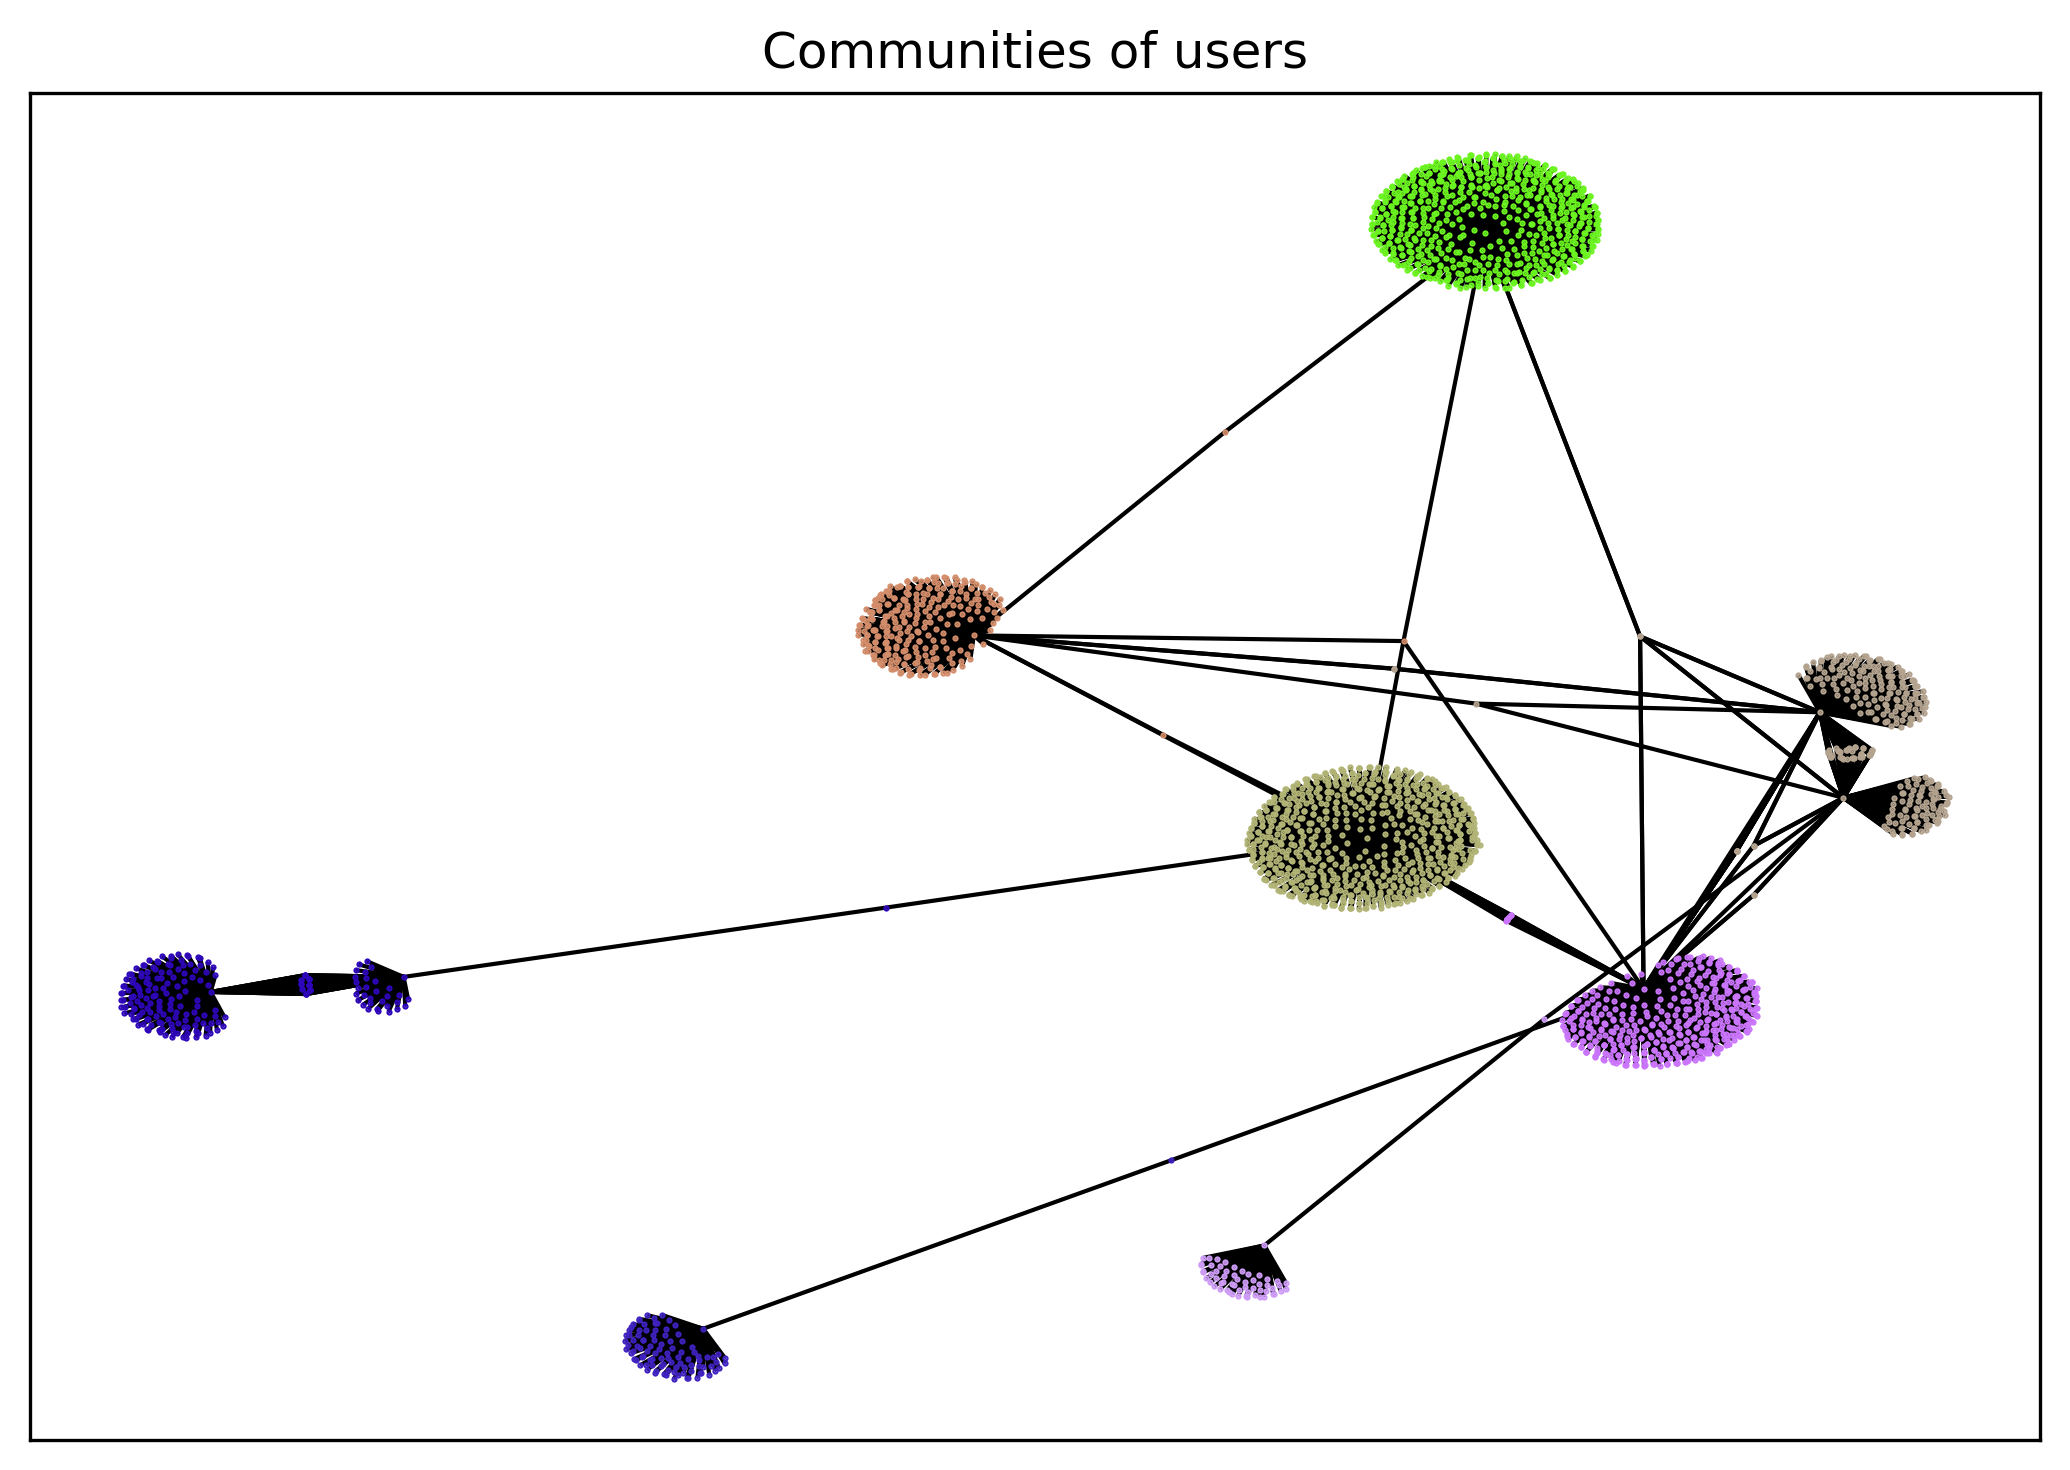

In [2]:
#Make the graph using data in an edgelist(node1,node2) format
G = nx.read_edgelist("facebook_friends\\fb.txt",create_using=nx.Graph(), nodetype = int)

#based on louvain algorithm
#find 'best' communities of users. Partiton is a dict in which user are mapped to a community.
partition = community_louvain.best_partition(G)

#Make array of colors to assign color to each community
no_of_communities=list(set(partition.values()))
colors = []
for i in range(len(no_of_communities)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

#Draw the graph
fig= plt.figure(figsize=(7,5), dpi=300, edgecolor='black', clear=True)
pos = nx.spring_layout(G)
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 0.25, node_color = colors[com])
nx.draw_networkx_edges(G, pos)
plt.title("Communities of users")
plt.tight_layout()
plt.show()

In [3]:
#check the modularity of communities
community_louvain.modularity(partition, G, weight='weight')

0.8086875493804493

In [4]:
user_com = partition.copy()

In [5]:
#the no. of distinct communities found
set(user_com.values())

{0, 1, 2, 3, 4, 5, 6, 7}

### Lets rename the community name to alphabets

In [6]:
new_comm_name={0:'A',1:'B',2:'C', 3:'D', 4:'E',5:'F',6:'G',7:'H'}
for key,value in new_comm_name.items():
    for person,com in partition.items():
        if(com==key):
            user_com[person] = value

In [7]:
set(user_com.values())

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'}

### Find the name of the community to which user belongs

In [8]:
def get_user_community_name(user):
    for person,com in user_com.items():
        if(user==person):
            return com

In [9]:
get_user_community_name(345)

'D'

### Find all users in the community

In [10]:
def find_users_in_communty(community_name):
    users=[]
    for person,com in user_com.items():
        if(com==community_name):
            users.append(person)
    return users

### The data is in <user1 user2> format.It means user_1 is a friend of user_2

In [11]:
user_user = pd.read_csv("facebook_friends\\fb.txt",sep=" ",header = None,names=['user_1','user_2'])

In [12]:
user_user

,user_1,user_2
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6
...,...,...
2976,2699,2884
2977,2699,2885
2978,2699,2886
2979,2699,2887


### Lets convert it into adjacency matrix

In [13]:
G = nx.read_weighted_edgelist("facebook_friends\\fb.txt",create_using=nx.DiGraph(), nodetype = int)
r=np.arange(1,2889)
user_user_matrix=biadjacency_matrix(G, row_order=r, column_order=r, weight= None, dtype=None, format='csr')
user_user_matrix=pd.DataFrame(user_user_matrix.todense(), index=r, columns=r)

In [14]:
user_user_matrix

,1,2,3,4,5,6,7,8,9,10,...,2879,2880,2881,2882,2883,2884,2885,2886,2887,2888
1,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### tranform it into symmetric matrix as friendship relation is commutative

In [15]:
user_user_symMatrix = user_user_matrix.copy()
for i in range(1,2889):
    for j in range(1,i):
        user_user_symMatrix.at[i,j] = user_user_matrix.at[j,i]

In [16]:
user_user_symMatrix

,1,2,3,4,5,6,7,8,9,10,...,2879,2880,2881,2882,2883,2884,2885,2886,2887,2888
1,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### find friends of specific user

In [17]:
def get_users_friends(person):
    friends=[]
    for i in user_user_symMatrix.columns:
        if(user_user_symMatrix.at[person,i]==1):
            friends.append(i)
    return friends

### find the recommended friends

In [18]:
def recommended_friends(person):
    community_name = get_user_community_name(person)
    users_in_community = find_users_in_communty(community_name)
    persons_friends = get_users_friends(person)
    recomm_frnds = set(users_in_community).difference(set(persons_friends).union({person}))
    return community_name, users_in_community, persons_friends, recomm_frnds

In [24]:
community_name, users_in_community, frnds_of_user, suggested_friends = recommended_friends(2699)

In [25]:
community_name

'H'

In [26]:
len(users_in_community)

203

In [27]:
len(frnds_of_user)

55

In [28]:
len(suggested_friends)

147